In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from scipy import stats
from tkinter import *
import pickle

from collections import Counter


import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("../../../data/kc_house_data.csv")

In [3]:
with open("ohe.pkl", "rb") as f:
    _ = pickle.load(f)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.drop(["id", "waterfront", "view","condition", "sqft_basement", "lat", "long"], axis=1, inplace=True)

In [6]:
df.head(1)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3        1.0         1180      5650     1.0   

   grade  sqft_above  yr_built  yr_renovated  zipcode  sqft_living15  \
0      7        1180      1955           0.0    98178           1340   

   sqft_lot15  
0        5650

In [7]:
_.categories_[0]

array([98001., 98002., 98003., 98004., 98005., 98006., 98007., 98008.,
       98010., 98011., 98014., 98019., 98022., 98023., 98024., 98027.,
       98028., 98029., 98030., 98031., 98032., 98033., 98034., 98038.,
       98039., 98040., 98042., 98045., 98052., 98053., 98055., 98056.,
       98058., 98059., 98065., 98070., 98072., 98074., 98075., 98077.,
       98092., 98102., 98103., 98105., 98106., 98107., 98108., 98109.,
       98112., 98115., 98116., 98117., 98118., 98119., 98122., 98125.,
       98126., 98133., 98136., 98144., 98146., 98148., 98155., 98166.,
       98168., 98177., 98178., 98188., 98198., 98199.])

In [8]:
df.date

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [9]:
def rmse(predictions, targets):
    return np.sqrt(np.mean((predictions-targets)**2))

In [10]:
def model(x, target_df, standard=False, minmax=False):
        #does log work on a bunh of columns at once?
#         x = np.log(x)
        #x = np.log(x)
        
    #split data 
    X_train, X_test, y_train, y_test = train_test_split(x, target_df, random_state=42)
    
    #Implement scaler options if scaler parameters != None
    if minmax:
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        
    if standard:
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        
    #create model
    model = LinearRegression()
    #fit data to model
    model.fit(x, target_df)
    
    return model
    
    #Model coef
    df_column_names = x.columns
    coef = pd.DataFrame(list(zip(df_column_names, model.coef_)), columns = ["feature","weight"])\
    .sort_values("weight", ascending=False)
    
    #Make predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    if log:
        pass
#         train_rmse = rmse(np.exp(train_pred), np.exp(y_train.values))
#         test_rmse = rmse(np.exp(test_pred), np.exp(y_test.values))
    else:
    
        #train rmse
        train_rmse = rmse(train_pred, y_train.values)
        #test rmse
        test_rmse = rmse(test_pred, y_test.values)

    return ( round(train_rmse,2), round(test_rmse, 2), coef, model)

In [11]:
def testmodel(x, target_df, standard=False, minmax=False, log=False):
        #does log work on a bunh of columns at once?
#         x = np.log(x)
        #x = np.log(x)
    if log:
        
        target_df = np.log(target_df)
        
    #split data 
    X_train, X_test, y_train, y_test = train_test_split(x, target_df, random_state=42)
    
    #Implement scaler options if scaler parameters != None
    if minmax:
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        
    if standard:
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        
    #create model
    model = LinearRegression()
    #fit data to model
    model.fit(x, target_df)

    #Model coef
    df_column_names = x.columns
    coef = pd.DataFrame(list(zip(df_column_names, model.coef_)), columns = ["feature","weight"])\
    .sort_values("weight", ascending=False)
    
    #Make predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    if log:
        train_rmse = rmse(np.exp(train_pred), np.exp(y_train.values))
        test_rmse = rmse(np.exp(test_pred), np.exp(y_test.values))
    else:
    
        #train rmse
        train_rmse = rmse(train_pred, y_train.values)
        #test rmse
        test_rmse = rmse(test_pred, y_test.values)

    return ( round(train_rmse,2), round(test_rmse, 2), test_pred, y_test.values)

# Put best model in get prediction function

In [12]:
def get_prediction(x):
    #create model
    model = LinearRegression()
    #fit best feature df and target to model
    model.fit(all_df, target)
    
    #get prediction for x(user inputs) based off of fitted model
    pred = model.predict(x)
    return pred

In [13]:
def click():
    entries = []
    column_names = ["sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms", "bedrooms", "floors", "sqft_lot15", "sqft_lot", "zipcode", "age"]
    
    #saves text entry to entered_text variable when function is called by button press
    entries.append(sqft_living.get())
    entries.append(grade.get())
    entries.append(sqft_above.get())
    entries.append(sqft_living15.get())
    entries.append(bathrooms.get())
    entries.append(bedrooms.get())
    entries.append(floors.get())
    entries.append(sqft_lot15.get())
    entries.append(sqft_lot.get())
    entries.append(zipcode.get())
    entries.append(age.get())
    
    entries_df = pd.DataFrame([entries], columns= column_names)
    
    #one hot encode zip code column then drop it
    zip_code = entries_df[['zipcode']]
    onehot = OneHotEncoder(sparse=False)
    onehot_data = onehot.fit_transform(zip_code)
    zip_code = pd.DataFrame(onehot_data, columns=onehot.get_feature_names())
    entries_df = pd.concat([entries_df,zip_code],axis=1)
    
    print(entries_df)
#     ##Call model() function at end of this function to get output
#     predicted_price = get_prediction(entries_df)
    
#     if all(item != "" and is_number(item) for item in entries): 
#         #Clear output text box and output new word to it.
#         output.delete(0.0,END)
#         output.insert(END, predicted_price)
#     else:
#         output.delete(0.0,END)
#         output.insert(END, "Error: Missing or Invalid Entries")

In [14]:
def top_entries(df):
    #df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()
    
    mat = df.corr().abs()
    
    # Remove duplicate and identity entries
    mat.loc[:,:] = np.tril(mat.values, k=-1)
    mat = mat[mat>0]

    # Unstack, sort ascending, and reset the index, so features are in columns
    # instead of indexes (allowing e.g. a pretty print in Jupyter).
    # Also rename these it for good measure.
    return (mat.unstack()
             .sort_values(ascending=False)
             .reset_index()
             .rename(columns={
                 "level_0": "feature_a",
                 "level_1": "feature_b",
                 0: "correlation"
             }))

In [15]:
def is_number(a):
    # will be True also for 'NaN'
    try:
        number = float(a) or number == int(a)
        return True
    except ValueError:
        return False

# import data

In [16]:
path = "../../../data/kc_house_data.csv"

In [17]:
df = pd.read_csv(path)

# Clean the data

In [18]:
def clean(df):
    entries_df['sqft_living'] = entries_df['sqft_living'].astype(float)
    entries_df['bedrooms'] = entries_df['bedrooms'].astype(float)
    entries_df['bathrooms'] = entries_df['bathrooms'].astype(float)
    entries_df['grade'] = entries_df['grade'].astype(float)
    entries_df['sqft_above'] = entries_df['sqft_above'].astype(float)
    entries_df['sqft_living15'] = entries_df['sqft_living15'].astype(float)
    entries_df['sqft_lot15'] = entries_df['sqft_lot15'].astype(float)
    entries_df['sqft_lot'] = entries_df['sqft_lot'].astype(float)
    entries_df['months_ago_sold'] = entries_df['months_ago_sold'].astype(float)
    entries_df['age'] = entries_df['age'].astype(float)
    entries_df['floors'] = entries_df['floors'].astype(float)
    
    df["age"] = df["yr_built"].map(lambda x: 2021 - x)
    df["months_ago_sold"] = df["date"].map(lambda date: float(date.split("/")[0]) + (2021- float(date.split("/")[2]) )*12)
    
    zip_code = df[['zipcode']]
    onehot = OneHotEncoder(sparse=False)
    onehot_data = onehot.fit_transform(zip_code)
    zip_code = pd.DataFrame(onehot_data, columns=onehot.get_feature_names())
    df = pd.concat([df,zip_code],axis=1)

    # Top cross correlations via function at head of notebook
    df["sqft_living&above"] = df["sqft_living"] * df["sqft_above"]
    df["sqft_living&grade"] = df["sqft_living"] * df["grade"]
    df["sqft_living&living15"] = df["sqft_living"] * df["sqft_living15"]
    df["grade&sqft_above"] = df["grade"] * df["sqft_living"]
    df["bathrooms&sqft_living"] = df["bathrooms"] * df["sqft_living"]
    df["sqft_above&sqft_living15"] = df["sqft_above"] *df["sqft_living15"]
    df["grade&sqft_above"] = df["grade"] * df["sqft_above"]
    df["grade&sqft_living15"] = df["grade"] * df["sqft_living15"]
    df["grade&sqft_above"] = df["grade"] * df["sqft_above"]

    df.drop(["waterfront", "yr_renovated", "view", "lat", 'yr_built', 'date', 'zipcode', 'id', 'sqft_basement', 'zipcode'], axis=1, inplace=True)
    df.dropna(inplace=True)

    #drop outliers
    z_scores = stats.zscore(df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade','sqft_above','sqft_living15','sqft_lot15', "price"]])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3).all(axis=1)
    df = df[filtered_entries]

    return df

### turn columns into floats

In [19]:
df['sqft_living'] = df['sqft_living'].astype(float)
df['bedrooms'] = df['bedrooms'].astype(float)
df['condition'] = df['condition'].astype(float)
df['grade'] = df['grade'].astype(float)
df['sqft_above'] = df['sqft_above'].astype(float)
df['yr_built'] = df['yr_built'].astype(float)
df['zipcode'] = df['zipcode'].astype(float)
df['sqft_living15'] = df['sqft_living15'].astype(float)
df['sqft_lot15'] = df['sqft_lot15'].astype(float)
df['sqft_lot'] = df['sqft_lot'].astype(float)

# Create new columns

In [20]:
df["age"] = df["yr_built"].map(lambda x: 2021 - x)

In [21]:
df["months_ago_sold"] = df["date"].map(lambda date: float(date.split("/")[0]) + (2021- float(date.split("/")[2]) )*12)

### Add zip code(categorical) columns

In [22]:
zip_code = df[['zipcode']]
onehot = OneHotEncoder(sparse=False)
onehot_data = onehot.fit_transform(zip_code)
zip_code = pd.DataFrame(onehot_data, columns=onehot.get_feature_names())
df = pd.concat([df,zip_code],axis=1)

In [23]:
with open('ohe.pkl', 'wb') as f:
    pickle.dump(onehot, f)

### Add cross product columns

In [24]:
# Top cross correlations via function at head of notebook
top = top_entries(df).dropna()

In [25]:
top = top[top["feature_a"].str.contains("&", "price")==False]
top = top[top["feature_b"].str.contains("&")==False]
top = top[top["feature_b"].str.contains("price")==False]

In [26]:
df["sqft_living&above"] = df["sqft_living"] * df["sqft_above"]
df["sqft_living&grade"] = df["sqft_living"] * df["grade"]
df["sqft_living&living15"] = df["sqft_living"] * df["sqft_living15"]
df["grade&sqft_above"] = df["grade"] * df["sqft_living"]
df["bathrooms&sqft_living"] = df["bathrooms"] * df["sqft_living"]
df["sqft_above&sqft_living15"] = df["sqft_above"] *df["sqft_living15"]
df["grade&sqft_above"] = df["grade"] * df["sqft_above"]
df["grade&sqft_living15"] = df["grade"] * df["sqft_living15"]
df["grade&sqft_above"] = df["grade"] * df["sqft_above"]

### Drop useless columns

In [27]:
df.drop(["waterfront", "yr_renovated", "view", "lat", 'yr_built', 'date', 'zipcode', 'id', 'sqft_basement', 'zipcode'], axis=1, inplace=True)

### Drop na from dataset

In [28]:
df.dropna(inplace=True)

# Eliminate outliers

In [29]:
z_scores = stats.zscore(df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade','sqft_above','sqft_living15','sqft_lot15', "price"]])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

In [30]:
df = df[filtered_entries]

# Counter of how many times each unique element appears in categorical columns

In [31]:
Counter(df["age"]);

# Get ascending list of correlations

In [32]:
corrs = df.corr()["price"].sort_values(ascending=False).drop("price")

In [33]:
pd.DataFrame(corrs)[:10]

price
sqft_living&grade         0.680787
grade                     0.640878
sqft_living&living15      0.634868
sqft_living               0.631505
grade&sqft_living15       0.628235
bathrooms&sqft_living     0.609536
sqft_living&above         0.586148
grade&sqft_above          0.584144
sqft_living15             0.560833
sqft_above&sqft_living15  0.560066

# Create variable called target that contains price column of full df

In [34]:
target = df["price"]

# Create baseline model

In [35]:
baseline_df = df[[corrs.keys()[0]]]

In [36]:
testmodel(baseline_df, target)[:2]

(182336.69, 179507.76)

# Create model with top 3

In [37]:
top3_df = df[[corrs.keys()[0], corrs.keys()[1], corrs.keys()[2]]]

In [38]:
testmodel(top3_df, target)[:2]

(179317.18, 176639.52)

# Top 7 correlated

In [39]:
top7_df = df[[corrs.keys()[0], corrs.keys()[1], corrs.keys()[2], corrs.keys()[3], corrs.keys()[4], corrs.keys()[5], corrs.keys()[6]]]

In [40]:
testmodel(top7_df, target, standard=True)[:2]

(408594.04, 405954.27)

# All usable besides zip code

In [41]:
all_nozip_df = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade','sqft_above', 'sqft_living15', 'sqft_lot15', 'age', 'months_ago_sold', 'sqft_living&above', 'sqft_living&grade', 'sqft_living&living15', 'grade&sqft_above', 'bathrooms&sqft_living', 'sqft_above&sqft_living15', 'grade&sqft_living15']]

In [42]:
testmodel(all_nozip_df, target)[:2]

(156101.43, 153769.06)

In [43]:
all_nozip_df

bedrooms  bathrooms  sqft_living  sqft_lot  floors  grade  sqft_above  \
0           3.0       1.00       1180.0    5650.0     1.0    7.0      1180.0   
1           3.0       2.25       2570.0    7242.0     2.0    7.0      2170.0   
2           2.0       1.00        770.0   10000.0     1.0    6.0       770.0   
3           4.0       3.00       1960.0    5000.0     1.0    7.0      1050.0   
4           3.0       2.00       1680.0    8080.0     1.0    8.0      1680.0   
...         ...        ...          ...       ...     ...    ...         ...   
21592       3.0       2.50       1530.0    1131.0     3.0    8.0      1530.0   
21593       4.0       2.50       2310.0    5813.0     2.0    8.0      2310.0   
21594       2.0       0.75       1020.0    1350.0     2.0    7.0      1020.0   
21595       3.0       2.50       1600.0    2388.0     2.0    8.0      1600.0   
21596       2.0       0.75       1020.0    1076.0     2.0    7.0      1020.0   

       sqft_living15  sqft_lot15   age  months_ago_sold  sqft_living&above  \
0             1340.0      5650.0  66.0             94.0          1392400.0   
1             1690.0      7639.0  70.0             96.0          5576900.0   
2             2720.0      8062.0  88.0             74.0           592900.0   
3             1360.0      5000.0  56.0             96.0          2058000.0   
4             1800.0      7503.0  34.0             74.0          2822400.0   
...              ...         ...   ...              ...                ...   
21592         1530.0      1509.0  12.0             89.0          2340900.0   
21593         1830.0      7200.0   7.0             74.0          5336100.0   
21594         1020.0      2007.0  12.0             90.0          1040400.0   
21595         1410.0      1287.0  17.0             73.0          2560000.0   
21596         1020.0      1357.0  13.0             94.0          1040400.0   

       sqft_living&grade  sqft_living&living15  grade&sqft_above  \
0                 8260.0             1581200.0            8260.0   
1                17990.0             4343300.0           15190.0   
2                 4620.0             2094400.0            4620.0   
3                13720.0             2665600.0            7350.0   
4                13440.0             3024000.0           13440.0   
...                  ...                   ...               ...   
21592            12240.0             2340900.0           12240.0   
21593            18480.0             4227300.0           18480.0   
21594             7140.0             1040400.0            7140.0   
21595            12800.0             2256000.0           12800.0   
21596             7140.0             1040400.0            7140.0   

       bathrooms&sqft_living  sqft_above&sqft_living15  grade&sqft_living15  
0                     1180.0                 1581200.0               9380.0  
1                     5782.5                 3667300.0              11830.0  
2                      770.0                 2094400.0              16320.0  
3                     5880.0                 1428000.0               9520.0  
4                     3360.0                 3024000.0              14400.0  
...                      ...                       ...                  ...  
21592                 3825.0                 2340900.0              12240.0  
21593                 5775.0                 4227300.0              14640.0  
21594                  765.0                 1040400.0               7140.0  
21595                 4000.0                 2256000.0              11280.0  
21596                  765.0                 1040400.0               7140.0  

[20331 rows x 18 columns]

# All usable columns (zip code and cross multiplications added)

In [44]:
all_df = df.drop(['price', 'long', 'condition'],axis=1)

In [45]:
all_df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade',
       'sqft_above', 'sqft_living15', 'sqft_lot15', 'age', 'months_ago_sold',
       'x0_98001.0', 'x0_98002.0', 'x0_98003.0', 'x0_98004.0', 'x0_98005.0',
       'x0_98006.0', 'x0_98007.0', 'x0_98008.0', 'x0_98010.0', 'x0_98011.0',
       'x0_98014.0', 'x0_98019.0', 'x0_98022.0', 'x0_98023.0', 'x0_98024.0',
       'x0_98027.0', 'x0_98028.0', 'x0_98029.0', 'x0_98030.0', 'x0_98031.0',
       'x0_98032.0', 'x0_98033.0', 'x0_98034.0', 'x0_98038.0', 'x0_98039.0',
       'x0_98040.0', 'x0_98042.0', 'x0_98045.0', 'x0_98052.0', 'x0_98053.0',
       'x0_98055.0', 'x0_98056.0', 'x0_98058.0', 'x0_98059.0', 'x0_98065.0',
       'x0_98070.0', 'x0_98072.0', 'x0_98074.0', 'x0_98075.0', 'x0_98077.0',
       'x0_98092.0', 'x0_98102.0', 'x0_98103.0', 'x0_98105.0', 'x0_98106.0',
       'x0_98107.0', 'x0_98108.0', 'x0_98109.0', 'x0_98112.0', 'x0_98115.0',
       'x0_98116.0', 'x0_98117.0', 'x0_98118.0', 'x0_98119.0', 'x0_98122.0

In [46]:
testmodel(all_df, target)[:2]

(105202.55, 105940.13)

In [47]:
all_use_preds = testmodel(all_df,target)[-2]

In [48]:
all_use_real = testmodel(all_df,target)[-1]

In [49]:
len(all_df.columns)

88

# All with minmax

In [50]:
testmodel(all_df, target, minmax=True)[:2]

(343163.73, 339071.15)

# All with standard

In [51]:
testmodel(all_df, target, standard=True)[:2]

(22900035624.97, 22759781361.72)

In [52]:
target

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 20331, dtype: float64

# All with standard and log

In [53]:
best = model(all_df, target)

# All with minmax

In [54]:
testmodel(all_df, target, minmax=True)[:2]

(343163.73, 339071.15)

# All with standard

In [55]:
testmodel(all_df, target, standard=True)[:2]

(22900035624.97, 22759781361.72)

# All with standard and log

In [56]:
testmodel(all_df, target, standard=True, log=True)[:2]

(inf, inf)

# Price distribution skew

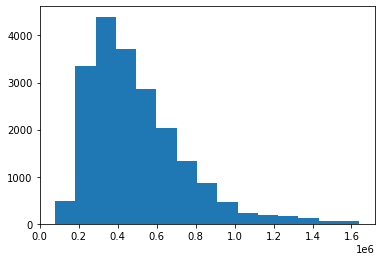

In [57]:
plt.hist(df.price, bins=15);

# Distribution of error in price

In [58]:
def quantile_error(y_pred, y_true, qant):
    quantiles = pd.DataFrame(pd.qcut(y_true, q=qant))
    e = y_pred - y_true
    quantiles['error'] = e
    quantiles.columns = ['price', 'error']
    error_df = quantiles.groupby('price').mean()['error']
    error_df = pd.DataFrame(error_df).reset_index()
    #sns.histplot(x=error_df["price"], y=error_df["error"])
    plt.rcParams["figure.figsize"] = (20, 10)
    figure =  error_df.plot.bar(x='price', y='error', rot=45)
    figure.set_title("Average Error by Price Interval",fontsize=24)
    figure.set_xlabel("Price Interval", fontsize=18)
    figure.set_ylabel("Average Error", fontsize=18)
    return figure

In [59]:
np.isnan(all_use_preds).sum()

0

In [60]:
np.isnan(all_use_real).sum()

0

<AxesSubplot:title={'center':'Average Error by Price Interval'}, xlabel='Price Interval', ylabel='Average Error'>

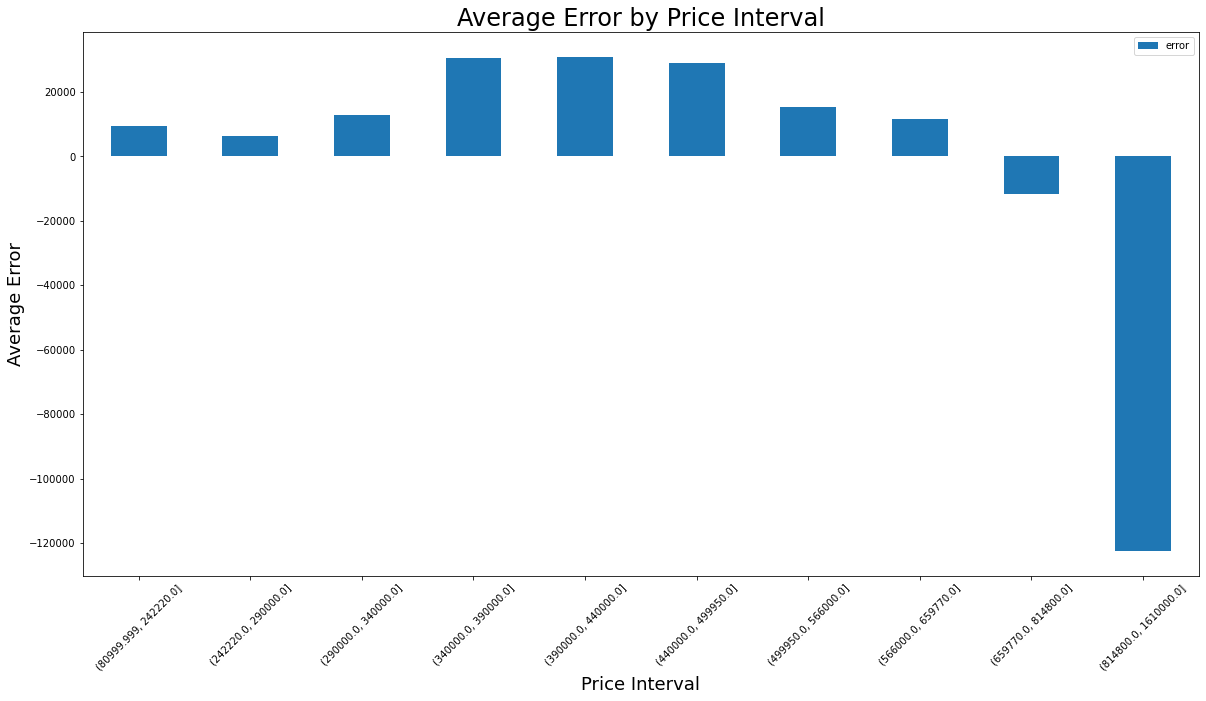

In [61]:
quantile_error(all_use_preds, all_use_real, 10)

# Feature importance

In [62]:
best

LinearRegression()

# Pickle best model

In [63]:
with open("model.pkl", "wb") as f:
    pickle.dump(best, f)

In [64]:
# #One hot encode zipcode
# zip_code = df[['zipcode']]
# onehot = OneHotEncoder(sparse=False)
# onehot_data = onehot.fit_transform(zip_code)
# zip_code = pd.DataFrame(onehot_data, columns=onehot.get_feature_names())
# df = pd.concat([df,zip_code],axis=1)